In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
bathy = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc')

In [3]:
    data = pd.read_csv(
        '/Users/sallen/Documents/MIDOSS/Testing/500_random_spills_barge_fix.csv', 
        parse_dates=[0],
                   )
data[0:2]

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,spill_volume,fuel_cargo,Lagrangian_template
0,2017-04-21 16:00:00,7,-122.560191,47.591101,330,587,other,368612000,110.392380,fuel,Lagrangian_diesel.dat
1,2015-04-23 19:00:00,7,-122.774521,48.535477,267,573,ferry,366709770,7709.325577,fuel,Lagrangian_diesel.dat


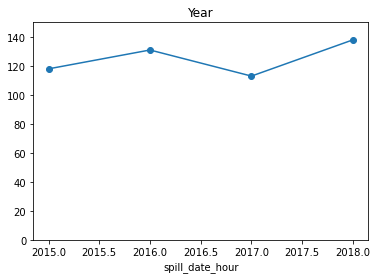

In [5]:
fig, ax = plt.subplots(1, 1)
data['spill_date_hour'].groupby(data.spill_date_hour.dt.year).agg('count').plot(style='o-', ax=ax);
ax.set_ylim(0, 150);
ax.set_title('Year');

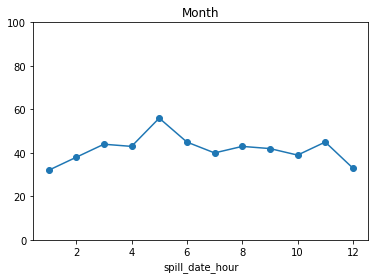

In [7]:
fig, ax = plt.subplots(1, 1)
data['spill_date_hour'].groupby(data.spill_date_hour.dt.month).agg('count').plot(style='o-', ax=ax);
ax.set_ylim(0, 100);
ax.set_title('Month');
ax.set_xlabel("Month")

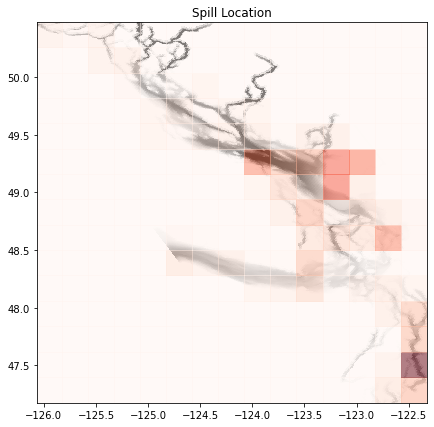

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap='Greys')
ax.hist2d(data.spill_lon, data.spill_lat, alpha=0.5, cmap='Reds', bins=15);
ax.set_title('Spill Location');

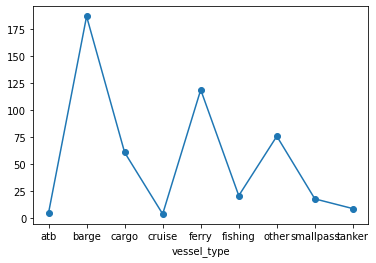

In [10]:
fig, ax = plt.subplots(1, 1)
data['vessel_type'].groupby(data.vessel_type).agg('count').plot(style='o-', ax=ax);

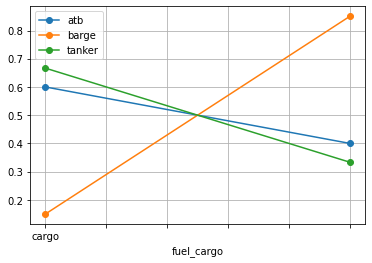

In [51]:
fig, ax = plt.subplots(1, 1)
for vessel in ['atb', 'barge', 'tanker']:
    total = (data[data.vessel_type == vessel].fuel_cargo.count())
    (data['fuel_cargo'].groupby(data.fuel_cargo[data.vessel_type == 
                                          vessel]).agg('count')/total).plot(
        style='o-', ax=ax, label=vessel);
ax.grid();
ax.legend();

Looks fixed.

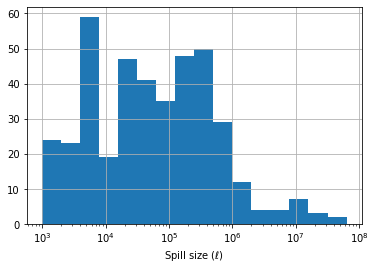

In [58]:
fig, ax = plt.subplots(1, 1)
logbins = 10**np.arange(3, 8, 0.3)
data['spill_volume'].hist(ax=ax,bins=logbins);
ax.set_xscale('log');
ax.set_xlabel('Spill size ($\ell$)');

In [56]:
data[data.spill_volume > 3e7]

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,spill_volume,fuel_cargo,Lagrangian_template
122,2015-09-10 01:00:00,7,-123.250755,49.294071,216,541,tanker,259095000,36570000.0,cargo,Lagrangian_gas.dat
456,2015-06-16 03:00:00,7,-123.280312,48.997031,236,539,tanker,636091469,39125410.0,cargo,Lagrangian_diesel.dat


In [18]:
data[data.Lagrangian_template != data.Lagrangian_template]

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,spill_volume,fuel_cargo,Lagrangian_template


In [61]:
logbins = 10**np.arange(0, 5, 0.3)
bincenter = 10**np.arange(0.3, 5, 0.3)
counts, bins = np.histogram(data.spill_volume/1000., bins=logbins)

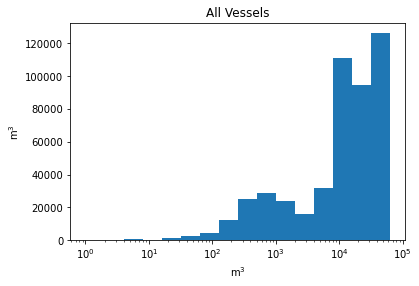

In [62]:
fig, ax = plt.subplots(1, 1)
ax.hist(bins[:-1], bins, weights=counts*bincenter);
ax.set_xlabel('m$^3$')
ax.set_ylabel('m$^3$');
ax.set_title('All Vessels')
ax.set_xscale('log');

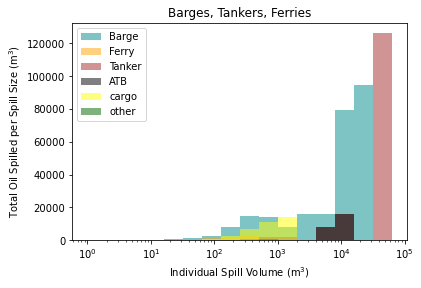

In [67]:
barge_counts, barge_bins = np.histogram(data[data.vessel_type == 'barge'].spill_volume/1000., 
                                        bins=logbins)
tanker_counts, tanker_bins = np.histogram(data[data.vessel_type == 'tanker'].spill_volume/1000., 
                                        bins=logbins)
ferry_counts, ferry_bins = np.histogram(data[data.vessel_type == 'ferry'].spill_volume/1000., 
                                        bins=logbins)
atb_counts, atb_bins = np.histogram(data[data.vessel_type == 'atb'].spill_volume/1000., 
                                        bins=logbins)
cargo_counts, cargo_bins = np.histogram(data[data.vessel_type == 'cargo'].spill_volume/1000., 
                                        bins=logbins)
other_counts, other_bins = np.histogram(data[data.vessel_type == 'other'].spill_volume/1000., 
                                        bins=logbins)
fig, ax = plt.subplots(1, 1)
ax.hist(logbins[:-1], logbins, weights=barge_counts*bincenter, color='darkcyan', alpha=0.5,
       label='Barge');
ax.hist(logbins[:-1], logbins, weights=ferry_counts*bincenter, color='orange', alpha=0.5,
       label='Ferry');
ax.hist(logbins[:-1], logbins, weights=tanker_counts*bincenter, color='brown', alpha=0.5,
       label='Tanker');
ax.hist(logbins[:-1], logbins, weights=atb_counts*bincenter, color='black', alpha=0.5,
       label='ATB');
ax.hist(logbins[:-1], logbins, weights=cargo_counts*bincenter, color='yellow', alpha=0.5,
       label='cargo');
ax.hist(logbins[:-1], logbins, weights=other_counts*bincenter, color='darkgreen', alpha=0.5,
       label='other');
ax.set_xlabel('Individual Spill Volume (m$^3$)')
ax.set_ylabel('Total Oil Spilled per Spill Size (m$^3$)');
ax.legend()
ax.set_xscale('log')
ax.set_title('Barges, Tankers, Ferries');

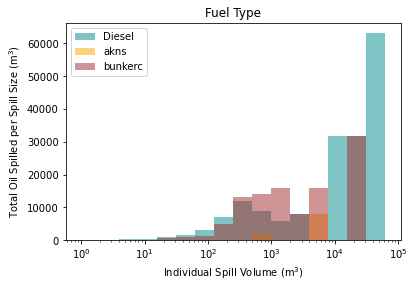

In [74]:
diesel_counts, diesel_bins = np.histogram(data[data.Lagrangian_template == 'Lagrangian_diesel.dat'].spill_volume/1000., 
                                        bins=logbins)
akns_counts, akns_bins = np.histogram(data[data.Lagrangian_template == 'Lagrangian_akns.dat'].spill_volume/1000., 
                                        bins=logbins)
bunkerc_counts, bunkerc_bins = np.histogram(data[data.Lagrangian_template == 'Lagrangian_bunker.dat'].spill_volume/1000., 
                                        bins=logbins)
fig, ax = plt.subplots(1, 1)
ax.hist(logbins[:-1], logbins, weights=diesel_counts*bincenter, color='darkcyan', alpha=0.5,
       label='Diesel');
ax.hist(logbins[:-1], logbins, weights=akns_counts*bincenter, color='orange', alpha=0.5,
       label='akns');
ax.hist(logbins[:-1], logbins, weights=bunkerc_counts*bincenter, color='brown', alpha=0.5,
       label='bunkerc');
ax.set_xlabel('Individual Spill Volume (m$^3$)')
ax.set_ylabel('Total Oil Spilled per Spill Size (m$^3$)');
ax.legend()
ax.set_xscale('log')
ax.set_title('Fuel Type');